In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset6=pd.read_csv('dataset1.csv')

In [3]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder

model_knn=NearestNeighbors(metric='cosine',algorithm='brute')


In [4]:
#applying the model
#defining the x and y 

y=dataset6['Course Name']

x=dataset6.drop(columns=['Course Name'])
z=dataset6.Institute

In [5]:
dataset6

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Sr.No.,Cut Off Merit (Score),Choice Code,Institute,Course Name,Exam (JEE/MHT- CET),Type,Seat Type,score
0,0,0,0,1,1,145 (207),321524510,3215 - Bhartiya Vidya Bhavan's Sardar Patel In...,Computer Engineering,JEE,AI to AI,AI,207
1,1,1,1,2,2,267 (191),617519110,"6175 - Pimpri Chinchwad Education Trust, Pimpr...",Civil Engineering,JEE,AI to AI,AI,191
2,2,2,2,3,3,310 (187),303650710,"3036 - Institute of Chemical Technology, Matun...",Chemical Engineering,JEE,AI to AI,AI,187
3,3,3,3,4,4,353 (182),627124510,"6271 - Pune Institute of Computer Technology, ...",Computer Engineering,JEE,AI to AI,AI,182
4,4,4,4,5,5,437 (175),321524610,3215 - Bhartiya Vidya Bhavan's Sardar Patel In...,Information Technology,JEE,AI to AI,AI,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,1112,1112,1112,1113,1113,104528 (39),660924510,"6609 - Jaihind College Of Engineering,Kuran",Computer Engineering,CET,AI to AI,AI,39
1113,1113,1113,1113,1114,1114,104549 (39),343624510,3436 - B.R. Harne College of Engineering & Tec...,Computer Engineering,CET,MH to AI,GNT1H,39
1114,1114,1114,1114,1115,1115,104551 (39),631529310,6315 - Holy-Wood Academy's Sanjeevan Engineeri...,Electrical Engineering,CET,AI to AI,AI,39
1115,1115,1115,1115,1116,1116,104578 (39),663224510,6632 - Navsahyadri Education Society's Group o...,Computer Engineering,CET,AI to AI,AI,39


In [6]:
x.isna().sum()

Unnamed: 0               0
Unnamed: 0.1             0
Unnamed: 0.1.1           0
Unnamed: 0.1.1.1         0
Sr.No.                   0
Cut Off Merit (Score)    0
Choice Code              0
Institute                0
Exam (JEE/MHT- CET)      0
Type                     0
Seat Type                0
score                    0
dtype: int64

In [7]:
x.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Sr.No.', 'Cut Off Merit (Score)', 'Choice Code', 'Institute',
       'Exam (JEE/MHT- CET)', 'Type', 'Seat Type', 'score'],
      dtype='object')

In [8]:
x=x[['Exam (JEE/MHT- CET)', 'Type', 'Seat Type', 'score']]

In [9]:


x['Type']=LabelEncoder().fit_transform(x['Type'])
x['Seat Type']=LabelEncoder().fit_transform(x['Seat Type'])
x['Exam (JEE/MHT- CET)']=LabelEncoder().fit_transform(x['Exam (JEE/MHT- CET)'])
x['Type']=LabelEncoder().fit_transform(x['Type'])
#x['Institute']=LabelEncoder().fit_transform(x['Institute'])
#x['Choice Code']=LabelEncoder().fit_transform(x['Choice Code'])


In [10]:
#from sklearn.model_selection import train_test_split
model_knn=model_knn.fit(x,y)

In [11]:
model_knn

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [12]:
score=dataset6.score

In [13]:
distances,indices=model_knn.kneighbors(x.iloc[11].values.reshape(1,-1),n_neighbors=5)
for i in range(0,len(distances.flatten())):
    if i==0:
        print('its the same',y[indices.flatten()[i]], distances.flatten()[i])
    else:
        print(y[indices.flatten()[i]], distances.flatten()[i],z[indices.flatten()[i]],score[indices.flatten()[i]])

its the same Computer Engineering 0.0
Electronics and Telecommunication
Engg 0.0 3215 - Bhartiya Vidya Bhavan's Sardar Patel Institute  of Technology , Andheri, Mumbai 150
Computer Engineering 0.0 6273 - Bansilal Ramnath Agarawal Charitable Trust's Vishwakarma Institute of
Technology, Bibwewadi, Pune 150
Information Technology 9.254563337890431e-09 6273 - Bansilal Ramnath Agarawal Charitable Trust's Vishwakarma Institute of
Technology, Bibwewadi, Pune 147
Surface Coating Technology 1.667869575783243e-08 3036 - Institute of Chemical Technology, Matunga, Mumbai 146


In [14]:
dataset6.iloc[11]

Unnamed: 0                                                              11
Unnamed: 0.1                                                            11
Unnamed: 0.1.1                                                          11
Unnamed: 0.1.1.1                                                        12
Sr.No.                                                                  12
Cut Off Merit (Score)                                            920 (150)
Choice Code                                                      627324510
Institute                6273 - Bansilal Ramnath Agarawal Charitable Tr...
Course Name                                           Computer Engineering
Exam (JEE/MHT- CET)                                                    JEE
Type                                                              AI to AI
Seat Type                                                               AI
score                                                                  150
Name: 11, dtype: object

In [15]:
x

,Exam (JEE/MHT- CET),Type,Seat Type,score
0,1,0,0,207
1,1,0,0,191
2,1,0,0,187
3,1,0,0,182
4,1,0,0,175
...,...,...,...,...
1112,0,0,0,39
1113,0,1,2,39
1114,0,0,0,39
1115,0,0,0,39


In [16]:
for i in range(0,len(distances.flatten())):
    if i==0:
        print('its the same',y[indices.flatten()[i]], distances.flatten()[i])
    else:
        print(y[indices.flatten()[i]], distances.flatten()[i])

its the same Computer Engineering 0.0
Electronics and Telecommunication
Engg 0.0
Computer Engineering 0.0
Information Technology 9.254563337890431e-09
Surface Coating Technology 1.667869575783243e-08


In [17]:
dataset6

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Sr.No.,Cut Off Merit (Score),Choice Code,Institute,Course Name,Exam (JEE/MHT- CET),Type,Seat Type,score
0,0,0,0,1,1,145 (207),321524510,3215 - Bhartiya Vidya Bhavan's Sardar Patel In...,Computer Engineering,JEE,AI to AI,AI,207
1,1,1,1,2,2,267 (191),617519110,"6175 - Pimpri Chinchwad Education Trust, Pimpr...",Civil Engineering,JEE,AI to AI,AI,191
2,2,2,2,3,3,310 (187),303650710,"3036 - Institute of Chemical Technology, Matun...",Chemical Engineering,JEE,AI to AI,AI,187
3,3,3,3,4,4,353 (182),627124510,"6271 - Pune Institute of Computer Technology, ...",Computer Engineering,JEE,AI to AI,AI,182
4,4,4,4,5,5,437 (175),321524610,3215 - Bhartiya Vidya Bhavan's Sardar Patel In...,Information Technology,JEE,AI to AI,AI,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,1112,1112,1112,1113,1113,104528 (39),660924510,"6609 - Jaihind College Of Engineering,Kuran",Computer Engineering,CET,AI to AI,AI,39
1113,1113,1113,1113,1114,1114,104549 (39),343624510,3436 - B.R. Harne College of Engineering & Tec...,Computer Engineering,CET,MH to AI,GNT1H,39
1114,1114,1114,1114,1115,1115,104551 (39),631529310,6315 - Holy-Wood Academy's Sanjeevan Engineeri...,Electrical Engineering,CET,AI to AI,AI,39
1115,1115,1115,1115,1116,1116,104578 (39),663224510,6632 - Navsahyadri Education Society's Group o...,Computer Engineering,CET,AI to AI,AI,39


In [19]:
x['branch']=y

In [20]:
x['branch']=LabelEncoder().fit_transform(x['branch'])

In [21]:
labels,unique=pd.factorize(dataset6['Seat Type'])

In [22]:
unique

Index(['AI', 'GNT2H', 'GNT1H', 'LOPENO', 'GSCO', 'GOPENO', 'LNT2H', 'LSCH',
       'LOPENH', 'GSCH', 'GSTO', 'LOBCH', 'GOPENH', 'GOBCH', 'GNT3H', 'LOBCO',
       'MI', 'GSTH', 'GNT3O', 'LSTH', 'LNT1H', 'GNT1O', 'PHCH', 'LSCO', 'GVJO',
       'GVJH', 'GOBCO', 'LNT3H', 'DEFO', 'LSTO', 'GNT2O', 'LVJH'],
      dtype='object')

In [23]:
z=x['Seat Type']

In [24]:
df3={}
dat=pd.DataFrame(columns=['true'])
for i in range(len(labels)):
    #x.loc[i,'Seat Type']
    #labels[1]
    if(x.loc[i,'Seat Type']==labels[i]):
        df3['true']='true'
    else:
        df3['true']='false'
    dat=dat.append(df3,ignore_index=True)    
    i=i+1
    
    

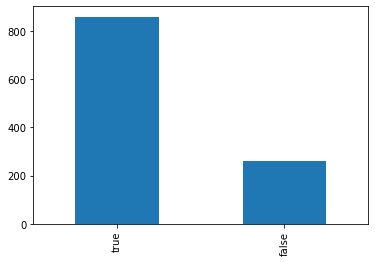

In [25]:
dat['true'].value_counts().plot(kind='bar')

In [26]:
sam=dat.groupby(dat['true'])


In [27]:
len(sam.get_group('true'))

858

In [84]:
sam.get_group('false')


,true
97,false
247,false
303,false
325,false
355,false
364,false
373,false
380,false
467,false
480,false


In [86]:
labels[97],x.loc[97,'Seat Type']

(1, 4)

In [87]:
labels[97],dataset6.loc[97,'Seat Type']

(1, 'GNT2H')

In [82]:
6581-5759

822

0.1249050296307552

In [17]:
distances,indices=model_knn.kneighbors(x.iloc[119].values.reshape(1,-1),n_neighbors=15)

In [18]:
df={}

df3=pd.DataFrame(columns=['branches','colrative_index'])
for i in range(0,len(distances.flatten())):
    if i==0:
        
        
        print('its the same',y[indices.flatten()[i]], distances.flatten()[i])
    else:
        print(y[indices.flatten()[i]], distances.flatten()[i])
        df['branch name']=y[indices.flatten()[i]]
        df['colrative_index']=distances.flatten()[i]
        df3=df3.append(df,ignore_index=True)
    

its the same Electronics and Telecommunication
Engg 0.0
Mechanical Engineering 0.0
Instrumentation Engineering 0.0
Civil Engineering 0.0
Electronics Engineering 0.0
Mechanical Engineering 0.0
Instrumentation Engineering 0.0
Computer Engineering 0.0
Information Technology 0.0
Mechanical Engineering 0.0
Electronics and Telecommunication
Engg 0.0
Computer Engineering 0.0
Computer Engineering 0.0
Computer Engineering 0.0
Computer Engineering 0.0


In [20]:
df3.drop(columns=['branches'])

,colrative_index,branch name
0,0.0,Mechanical Engineering
1,0.0,Instrumentation Engineering
2,0.0,Civil Engineering
3,0.0,Electronics Engineering
4,0.0,Mechanical Engineering
5,0.0,Instrumentation Engineering
6,0.0,Computer Engineering
7,0.0,Information Technology
8,0.0,Mechanical Engineering
9,0.0,Electronics and Telecommunication\nEngg


In [23]:
recocmmended_brancehs=pd.DataFrame(df3['branch name'].unique())
recocmmended_brancehs

NameError: name 'df3' is not defined

# to get the input

In [16]:
dataset6.iloc[110]

Unnamed: 0                                                             110
Unnamed: 0.1                                                           110
Unnamed: 0.1.1                                                         111
Sr.No.                                                                 111
Cut Off Merit (Score)                                            6262 (80)
Choice Code                                                      319024510
Institute                3190 - Terna Engineering College, Nerul, Navi ...
Course Name                                           Computer Engineering
Exam (JEE/MHT- CET)                                                    JEE
Type                                                              AI to AI
Seat Type                                                               AI
score                                                                   80
Name: 110, dtype: object

In [36]:
#giving the input to the model 
r={}
def to_int(x):
    return int(x)
for i in range(len(x.columns)):
        
    typ=type(dataset6[x.iloc[:,i].name][0])
    r[x.iloc[:,i].name]=typ(input("input the "+x.iloc[:,i].name+" expected type is "+str(typ)))
    
    if(typ==str):
        v=r[x.iloc[:,i].name]
        c=x.iloc[:,i].name
        print(v)
        k=dataset6[dataset6[c]==v].index
        if(len(k)>1):
            k=k[0]
            v=x[x.iloc[:,i].name][k]
        else:
            v=x[x.iloc[:,i].name][k]
        r[c]=v
        to_int(r[c])
        print(r[c])
    


input the Exam (JEE/MHT- CET) expected type is <class 'str'>JEE
JEE
1
input the Type expected type is <class 'str'>AI to AI
AI to AI
0
input the Seat Type expected type is <class 'str'>AI
AI
0
input the score expected type is <class 'numpy.int64'>145


In [37]:
r=pd.DataFrame([r])

In [38]:
import pickle

pickle.dump(model_knn,open("knn2.pkl",'wb'))

In [39]:
m_knn=pickle.load(open('knn2.pkl','rb'))

In [40]:
dist,indi=m_knn.kneighbors(r.iloc[0].values.reshape(1,-1),n_neighbors=15)
print(dist)

[[1.11554543e-09 4.40168102e-09 1.06134757e-08 2.64211391e-08
  2.64211391e-08 2.64211391e-08 8.10828605e-08 1.18231091e-07
  1.30473408e-07 1.60237797e-07 1.60237797e-07 1.93574455e-07
  2.30636114e-07 2.30636114e-07 2.89979210e-07]]


In [41]:
for i in range(len(indi.flatten())):
    print(z[indi.flatten()[i]],score[indi.flatten()[i]])

3036 - Institute of Chemical Technology, Matunga, Mumbai 146
6273 - Bansilal Ramnath Agarawal Charitable Trust's Vishwakarma Institute of
Technology, Bibwewadi, Pune 147
4115 - Shri Ramdeobaba College of Engineering and Management, Nagpur 142
6273 - Bansilal Ramnath Agarawal Charitable Trust's Vishwakarma Institute of
Technology, Bibwewadi, Pune 150
3215 - Bhartiya Vidya Bhavan's Sardar Patel Institute  of Technology , Andheri, Mumbai 150
3181 - K.J.Somaiya College of Engineering, Vidyavihar, Mumbai 150
3182 - Thadomal Shahani Engineering College, Bandra, Mumbai 137
3199 - Shri Vile Parle Kelvani Mandal's Dwarkadas J. Sanghvi College of Engineering,
Vile Parle,Mumbai 156
4115 - Shri Ramdeobaba College of Engineering and Management, Nagpur 135
3181 - K.J.Somaiya College of Engineering, Vidyavihar, Mumbai 134
3215 - Bhartiya Vidya Bhavan's Sardar Patel Institute  of Technology , Andheri, Mumbai 134
3036 - Institute of Chemical Technology, Matunga, Mumbai 133
3184 - Fr. Conceicao Rodrigue

In [56]:
dataset6[r.iloc[:,3].name][0]

207